In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('mixed_titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


<AxesSubplot:>

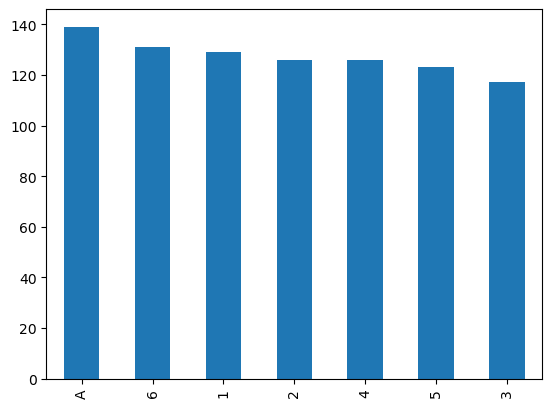

In [19]:
df['number'].value_counts().plot(kind='bar')

In [28]:
# extract the numerical part

df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')
df['number_cate']= np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [29]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_cate
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [30]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [32]:
# captures numerical part
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')

# captures the first letter
df['cabin_cat'] = df['Cabin'].str[0]

In [33]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_cate,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

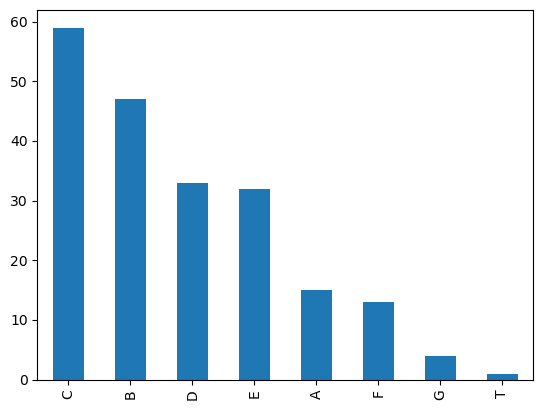

In [35]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [37]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.tail(20)

,Cabin,Ticket,number,Survived,number_numerical,number_cate,cabin_num,cabin_cat,ticket_num,ticket_cat
871,D35,11751,1,1,1.0,NaN,35,D,11751.0,NaN
872,B51 B53 B55,695,6,0,6.0,NaN,51,B,695.0,NaN
873,NaN,345765,6,0,6.0,NaN,NaN,NaN,345765.0,NaN
874,NaN,P/PP 3381,4,1,4.0,NaN,NaN,NaN,3381.0,P/PP
875,NaN,2667,A,1,NaN,A,NaN,NaN,2667.0,NaN
876,NaN,7534,A,0,NaN,A,NaN,NaN,7534.0,NaN
877,NaN,349212,5,0,5.0,NaN,NaN,NaN,349212.0,NaN
878,NaN,349217,6,0,6.0,NaN,NaN,NaN,349217.0,NaN
879,C50,11767,A,1,NaN,A,50,C,11767.0,NaN
880,NaN,230433,4,1,4.0,NaN,NaN,NaN,230433.0,NaN


<AxesSubplot:>

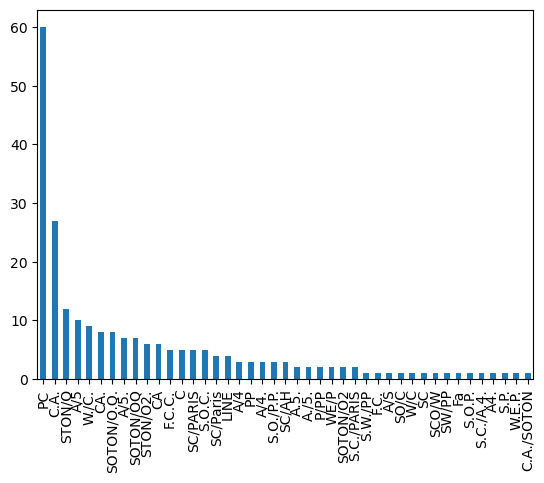

In [39]:
df['ticket_cat'].value_counts().plot(kind='bar')